In [16]:
"""
満足度分析を用いたクラスタリング(matplotlib)
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df_house=pd.read_csv('7-4-18_data.tsv',sep='\t',header=0) 
word = df_house.iloc[:,208:228] #検索キーワード("Q25"全て)
data_man = df_house.iloc[:,112:118] #サイトの使いやすさに関する満足度("Q8"全て)
data_site = df_house.iloc[:,[2,240,49]] #使用サイトをまとめたもの("SQ2","Q29","Q27",Q30)
datasite = data_site.dropna()
data_best = df_house["Q12_2"] #最もよく見たサイト
# data3_ = df_house.iloc[:, [188, 190]] 
data_act = df_house.iloc[:, 228:232] #賃貸情報サイトに対する行動("Q26"全て)
manzoku = df_house.iloc[:, 52:71] #表示に対する満足度("Q2"全て)
unite_data = pd.concat([word, data_man,data_site, data_best, data_act, manzoku], axis = 1)
unite_data = unite_data.dropna() #欠損値処理
unite_data = unite_data.astype("int")
unite_qst = unite_data.replace({"Q29":[3,4,5,6,7,10,13], "SQ7": [3,4,5,6,7,10,13]}, 28)
result = data_site["Q29"] == data_site["SQ7"] #数値の一致かどうか調べる
data_site['hantei'] = result.map({True: 1, False: 0}) #一致していた場合1,そうでない場合0
unite_word = unite_qst.iloc[:, :20] #欠損値処理済み(以下同)の検索キーワード("Q25"全て)
manz_unite = unite_qst.iloc[:, 34:] #表示に対する満足度("Q2"全て)
unite_more = unite_qst.iloc[:, 20:26] #サイトの使いやすさに関する満足度("Q8"全て)
unite_site = unite_qst.iloc[:, 27:28]#使用サイトをまとめたもの("SQ2","Q29","Q27",Q30)
unite_site_res = df_house["SQ7"]
unite_manzoku = pd.concat([manz_unite, unite_more],axis = 1) #満足度関連を結合したもの 
unite_manzoku

C:\Users\admin\AppData\Local\Temp\ipykernel_16648\2291373507.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_site['hantei'] = result.map({True: 1, False: 0}) #一致していた場合1,そうでない場合0


,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q2_7,Q2_8,Q2_9,Q2_10,...,Q2_16,Q2_17,Q2_18,Q2_19,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5,Q8_6
0,7,7,7,10,10,10,8,8,10,9,...,10,10,9,7,7,8,8,8,8,7
1,7,7,7,6,5,6,7,6,5,6,...,7,6,7,8,6,7,6,7,8,8
2,7,7,6,7,5,6,7,7,8,7,...,6,6,6,7,5,5,7,6,7,7
3,9,9,9,9,9,8,9,8,9,9,...,9,9,8,8,8,9,9,9,9,8
6,8,8,8,8,8,8,8,8,8,8,...,8,9,8,8,8,8,8,8,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1319,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
1320,7,7,6,7,6,6,6,6,6,6,...,6,6,6,6,6,6,6,5,6,6
1321,7,7,7,6,5,5,6,8,6,7,...,4,8,8,9,6,6,6,6,7,9
1322,9,10,10,10,9,8,10,8,9,10,...,9,9,9,10,8,7,7,8,9,10


In [18]:
unite_manzoku.describe() #確認のための感覚尺度

,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q2_7,Q2_8,Q2_9,Q2_10,...,Q2_16,Q2_17,Q2_18,Q2_19,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5,Q8_6
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,...,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,7.042596,7.133874,7.029412,7.025355,5.775862,6.105477,6.570994,6.733266,7.023327,6.929006,...,6.811359,6.697769,6.845842,6.937120,6.890467,6.217039,6.826572,6.773834,6.911765,6.937120
std,1.451137,1.482325,1.535418,1.510157,1.904700,1.720887,1.755493,1.701850,1.652091,1.614349,...,1.606115,1.697994,1.578590,1.627836,1.541365,1.809045,1.606252,1.574726,1.589088,1.627836
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,6.000000,6.000000,6.000000,6.000000,5.000000,5.000000,5.000000,6.000000,6.000000,6.000000,...,6.000000,5.000000,6.000000,6.000000,6.000000,5.000000,6.000000,6.000000,6.000000,6.000000
50%,7.000000,7.000000,7.000000,7.000000,6.000000,6.000000,7.000000,7.000000,7.000000,7.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,7.000000,7.000000
75%,8.000000,8.000000,8.000000,8.000000,7.000000,7.000000,8.000000,8.000000,8.000000,8.000000,...,8.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [19]:
from sklearn.preprocessing import StandardScaler
st_scaler = StandardScaler() #標準化を行う
st_scaler.fit(unite_manzoku)
st_scaler.transform(unite_manzoku)
unite_manzoku

,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q2_7,Q2_8,Q2_9,Q2_10,...,Q2_16,Q2_17,Q2_18,Q2_19,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5,Q8_6
0,7,7,7,10,10,10,8,8,10,9,...,10,10,9,7,7,8,8,8,8,7
1,7,7,7,6,5,6,7,6,5,6,...,7,6,7,8,6,7,6,7,8,8
2,7,7,6,7,5,6,7,7,8,7,...,6,6,6,7,5,5,7,6,7,7
3,9,9,9,9,9,8,9,8,9,9,...,9,9,8,8,8,9,9,9,9,8
6,8,8,8,8,8,8,8,8,8,8,...,8,9,8,8,8,8,8,8,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1319,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
1320,7,7,6,7,6,6,6,6,6,6,...,6,6,6,6,6,6,6,5,6,6
1321,7,7,7,6,5,5,6,8,6,7,...,4,8,8,9,6,6,6,6,7,9
1322,9,10,10,10,9,8,10,8,9,10,...,9,9,9,10,8,7,7,8,9,10


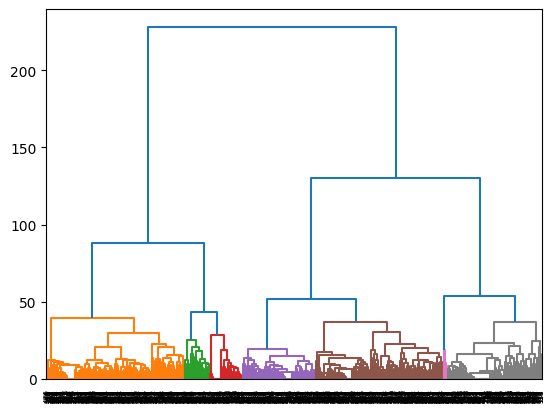

In [20]:
from scipy.cluster.hierarchy import linkage,dendrogram
# ウォード法とユーグリッド距離
unite_manz_cla = linkage(unite_manzoku, metric = "euclidean", method = "ward")
dendrogram(unite_manz_cla, color_threshold = 40)
plt.show()

In [21]:
from sklearn.cluster import KMeans
me = KMeans(n_clusters = 4, random_state = 0) #kmeans法の処理(4つのクラスターに分類)
unite_manzoku.values

array([[ 7,  7,  7, ...,  8,  8,  7],
       [ 7,  7,  7, ...,  7,  8,  8],
       [ 7,  7,  6, ...,  6,  7,  7],
       ...,
       [ 7,  7,  7, ...,  6,  7,  9],
       [ 9, 10, 10, ...,  8,  9, 10],
       [ 7,  6,  7, ...,  7,  7,  7]])

In [22]:
unite_manz_KM = me.fit_predict(unite_manzoku.values) #kmeans法の予測データによるクラス分け
unite_manz_KM

array([3, 2, 2, 3, 0, 1, 1, 1, 1, 2, 1, 2, 0, 0, 1, 0, 3, 2, 1, 2, 2, 0,
       0, 0, 1, 1, 3, 0, 0, 2, 1, 3, 3, 1, 2, 1, 1, 0, 2, 1, 3, 1, 2, 0,
       1, 2, 2, 1, 2, 2, 1, 1, 2, 0, 0, 0, 3, 2, 3, 0, 3, 0, 0, 0, 3, 0,
       3, 3, 2, 0, 0, 0, 1, 2, 1, 1, 2, 3, 1, 0, 1, 1, 1, 1, 3, 2, 2, 0,
       0, 1, 2, 2, 2, 3, 2, 2, 0, 1, 2, 2, 0, 0, 1, 2, 1, 0, 0, 2, 0, 1,
       2, 1, 0, 0, 0, 1, 1, 2, 1, 2, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 3, 2, 2, 0, 1, 2, 1, 3, 2, 2, 0, 2, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 2, 2, 1, 0, 2, 2, 0, 1, 1, 1, 0, 3, 0, 0, 0, 0, 2, 1,
       0, 3, 1, 2, 1, 0, 0, 2, 0, 0, 3, 3, 0, 0, 3, 2, 1, 0, 2, 0, 2, 0,
       2, 1, 2, 3, 2, 3, 1, 2, 0, 0, 0, 0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 0,
       0, 0, 2, 1, 0, 1, 0, 0, 1, 0, 3, 0, 0, 3, 1, 0, 0, 0, 0, 1, 0, 2,
       3, 2, 2, 0, 1, 2, 0, 2, 0, 1, 1, 1, 2, 0, 0, 0, 0, 1, 0, 0, 2, 3,
       3, 2, 0, 2, 3, 1, 3, 1, 0, 1, 1, 3, 0, 2, 1, 2, 2, 1, 2, 2, 1, 3,
       1, 2, 2, 2, 2, 2, 2, 0, 3, 0, 2, 2, 3, 0, 0,

In [23]:
unite_manzoku["ID"] = unite_manz_KM #kmeans法でクラス分けしたものをIDというカテゴリで代入
unite_manzoku

,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q2_7,Q2_8,Q2_9,Q2_10,...,Q2_17,Q2_18,Q2_19,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5,Q8_6,ID
0,7,7,7,10,10,10,8,8,10,9,...,10,9,7,7,8,8,8,8,7,3
1,7,7,7,6,5,6,7,6,5,6,...,6,7,8,6,7,6,7,8,8,2
2,7,7,6,7,5,6,7,7,8,7,...,6,6,7,5,5,7,6,7,7,2
3,9,9,9,9,9,8,9,8,9,9,...,9,8,8,8,9,9,9,9,8,3
6,8,8,8,8,8,8,8,8,8,8,...,9,8,8,8,8,8,8,8,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1319,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,1
1320,7,7,6,7,6,6,6,6,6,6,...,6,6,6,6,6,6,5,6,6,2
1321,7,7,7,6,5,5,6,8,6,7,...,8,8,9,6,6,6,6,7,9,2
1322,9,10,10,10,9,8,10,8,9,10,...,9,9,10,8,7,7,8,9,10,3


In [24]:
unite_manzoku["ID"].value_counts() #各ID別でみるクラス分けを行った際の人数のカウント

ID
0    358
2    321
1    199
3    108
Name: count, dtype: int64

In [25]:
unite_manzoku = unite_manzoku.astype("category") #カテゴリ型に変更

In [26]:
cate_lst = list(unite_manzoku.columns)[0:-1] #ダミー変数化する列(ID除く)
cate_lst

['Q2_1',
 'Q2_2',
 'Q2_3',
 'Q2_4',
 'Q2_5',
 'Q2_6',
 'Q2_7',
 'Q2_8',
 'Q2_9',
 'Q2_10',
 'Q2_11',
 'Q2_12',
 'Q2_13',
 'Q2_14',
 'Q2_15',
 'Q2_16',
 'Q2_17',
 'Q2_18',
 'Q2_19',
 'Q8_1',
 'Q8_2',
 'Q8_3',
 'Q8_4',
 'Q8_5',
 'Q8_6']

In [27]:
unite_manzoku_du = pd.get_dummies(unite_manzoku , columns = cate_lst) #ダミー変数にする処理

unite_manzoku_du

,ID,Q2_1_1,Q2_1_3,Q2_1_4,Q2_1_5,Q2_1_6,Q2_1_7,Q2_1_8,Q2_1_9,Q2_1_10,...,Q8_6_1,Q8_6_2,Q8_6_3,Q8_6_4,Q8_6_5,Q8_6_6,Q8_6_7,Q8_6_8,Q8_6_9,Q8_6_10
0,3,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,2,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,2,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,3,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
6,0,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1319,1,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1320,2,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1321,2,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1322,3,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True


In [28]:
unite_manz_gp = unite_manzoku_du.groupby("ID") #ダミー変数化したい数値をIDの値ごとに分ける

C:\Users\admin\AppData\Local\Temp\ipykernel_16648\1903874704.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unite_manz_gp = unite_manzoku_du.groupby("ID") #ダミー変数化したい数値をIDの値ごとに分ける


In [29]:
manz_group = unite_manz_gp.sum().T #質問の点数ごとにIDをグループ分け
manz_group

ID,0,1,2,3
Q2_1_1,0,2,0,0
Q2_1_3,0,2,0,0
Q2_1_4,0,21,2,0
Q2_1_5,1,108,12,0
Q2_1_6,20,45,132,0
...,...,...,...,...
Q8_6_6,14,23,118,0
Q8_6_7,121,9,123,2
Q8_6_8,172,4,37,15
Q8_6_9,36,0,6,34


In [30]:
# manz_group.style.bar(color="#4285F4")

<Figure size 1600x900 with 0 Axes>

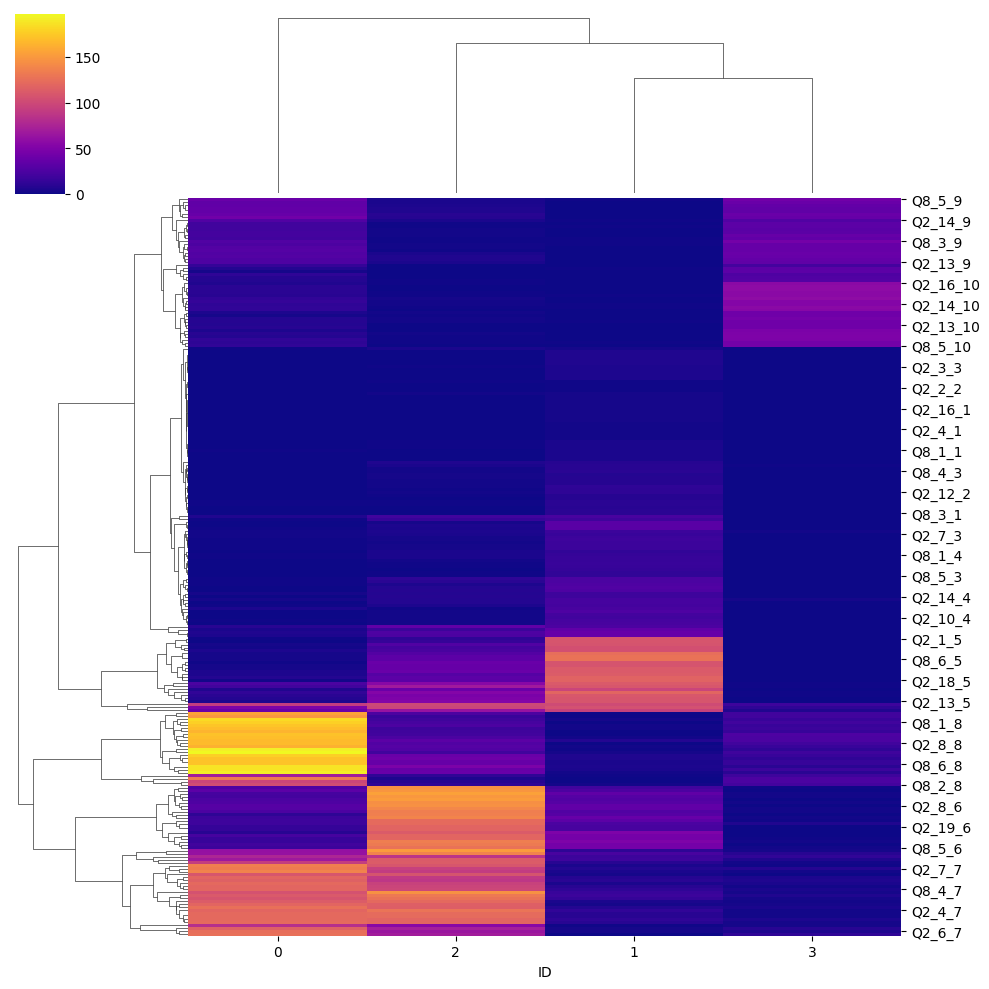

In [35]:
plt.figure(figsize = (16, 9))
sns.clustermap(manz_group, cmap = "plasma") #グループで分類した表をグラフ化
plt.show()

In [32]:
unite_manz_sq = pd.concat([unite_manzoku, unite_site_res], axis = 1)
unite_manz_sq = unite_manz_sq.astype("category")
print(unite_manz_sq.dtypes)
cate_site_lst = list(unite_manz_sq.columns)[0 : -1]
unite_site_du = pd.get_dummies(unite_manz_sq, columns = cate_site_lst)
# unite_site["Q29"] = unite_site["Q29"].astype("category")
# site_lst = list(unite_manzoku.columns)[0:-1]
# sq = pd.get_dummies( unite_site["Q29"], columns = site_lst)
unite_site_gp = unite_site_du.groupby("SQ7")
unite_site_gp
# unite_site_gp

Q2_1     category
Q2_2     category
Q2_3     category
Q2_4     category
Q2_5     category
Q2_6     category
Q2_7     category
Q2_8     category
Q2_9     category
Q2_10    category
Q2_11    category
Q2_12    category
Q2_13    category
Q2_14    category
Q2_15    category
Q2_16    category
Q2_17    category
Q2_18    category
Q2_19    category
Q8_1     category
Q8_2     category
Q8_3     category
Q8_4     category
Q8_5     category
Q8_6     category
ID       category
SQ7      category
dtype: object


C:\Users\admin\AppData\Local\Temp\ipykernel_16648\3223566619.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unite_site_gp = unite_site_du.groupby("SQ7")


In [33]:
site_group = unite_site_gp.sum().T
site_group

SQ7,1,2,3,4,6,7,8,9,10,11,...,17,18,19,20,21,23,24,25,26,27
Q2_1_1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Q2_1_3,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Q2_1_4,0,2,0,0,0,0,9,0,0,1,...,0,1,0,0,1,0,2,4,0,1
Q2_1_5,1,14,0,1,0,1,46,4,0,1,...,0,1,0,1,4,1,9,19,1,5
Q2_1_6,3,22,1,1,0,0,67,3,1,3,...,0,0,1,1,4,0,14,38,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q8_6_10,1,7,0,0,0,0,36,2,0,1,...,0,0,0,0,1,0,5,8,0,4
ID_0,3,56,0,0,1,3,145,5,0,4,...,0,2,1,1,6,0,19,67,2,15
ID_1,1,27,0,1,0,1,75,4,2,3,...,0,1,0,1,6,1,16,27,1,9
ID_2,3,34,1,1,0,0,122,4,0,3,...,0,1,0,2,9,0,20,68,1,19


<Figure size 1600x900 with 0 Axes>

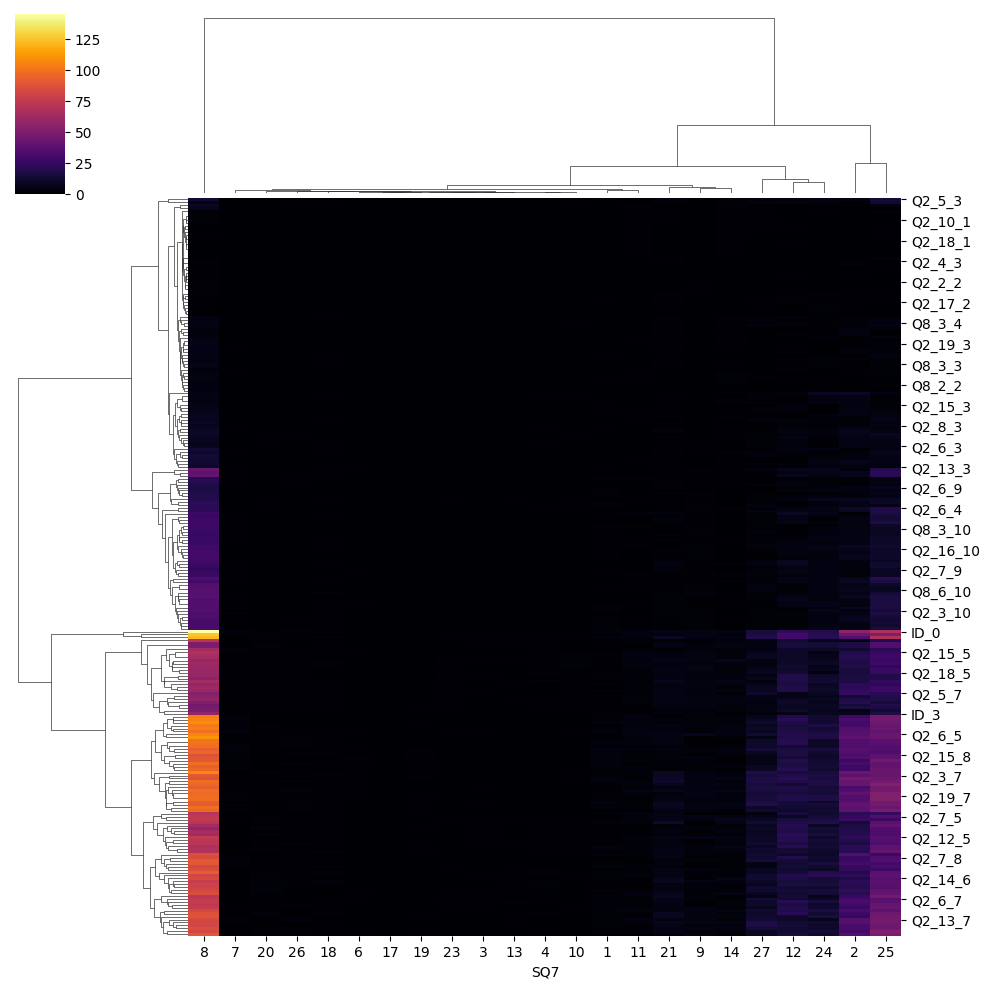

In [36]:
plt.figure(figsize = (16, 9))
sns.clustermap(site_group, cmap = "inferno")
plt.show()